## Analisis de puntos iniciales para NUM_PARAMS = 4

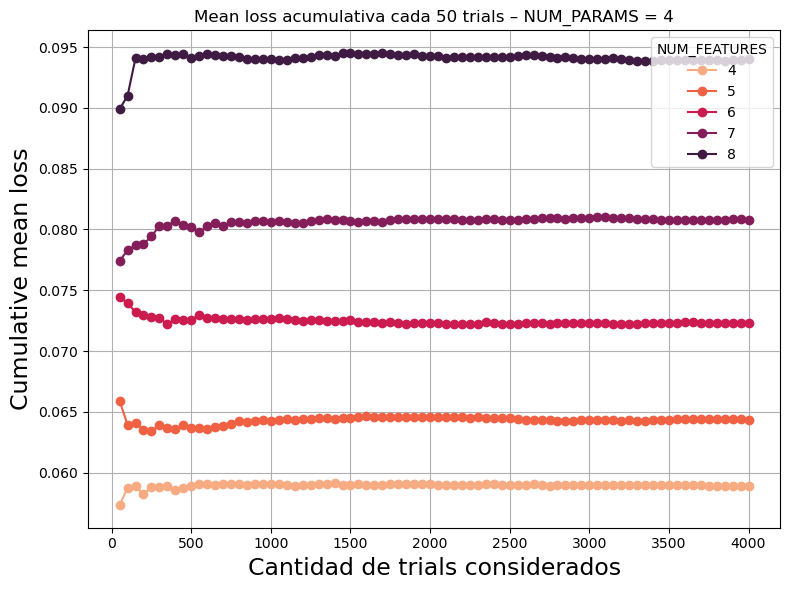

In [1]:
import pickle, glob, re
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/4params_sum_2" 
pattern  = f"{SAVE_DIR}/results_NUM_FEATURES_*_NUM_PARAMS_4_LAYERS_6.pkl"

rows = []

for fname in glob.glob(pattern):
    # Extraer el NUM_FEATURES del nombre del archivo
    m = re.search(r"NUM_FEATURES_(\d+)_NUM_PARAMS_4_", fname)
    if not m:
        continue
    num_features = int(m.group(1))

    # Cargar los trials de ese archivo
    with open(fname, "rb") as f:
        trials = pickle.load(f)

    # Ordenar por número de trial
    trials = sorted(trials, key=lambda r: r["trial"])
    losses = [r["loss"] for r in trials]

    # Promedio acumulativo cada 20 trials
    step = 50
    for k in range(step, len(losses)+1, step):
        mean_loss = sum(losses[:k]) / k
        rows.append({
            "NUM_FEATURES": num_features,
            "n_trials": k,
            "mean_loss": mean_loss
        })

df = pd.DataFrame(rows)


# Plot
palette = sns.color_palette("rocket", len(np.arange(4,9)))
plt.figure(figsize=(8,6))
for idx, feat in enumerate(sorted(df["NUM_FEATURES"].unique())):
    sub = df[df["NUM_FEATURES"] == feat]
    plt.plot(
        sub["n_trials"],
        sub["mean_loss"],
        marker="o",
        label=f"{feat}",
        color=palette[4-idx]
    )
plt.xlabel("Cantidad de trials considerados", fontsize=17)
plt.ylabel("Cumulative mean loss", fontsize=17)
plt.title(f"Mean loss acumulativa cada {step} trials – NUM_PARAMS = 4")
plt.legend(title="NUM_FEATURES")
plt.grid(True)
plt.tight_layout()
plt.show()


## Entrenamiento secuencial a partir de NUM_PARAMS=4 hasta NUM_PARAMS=8

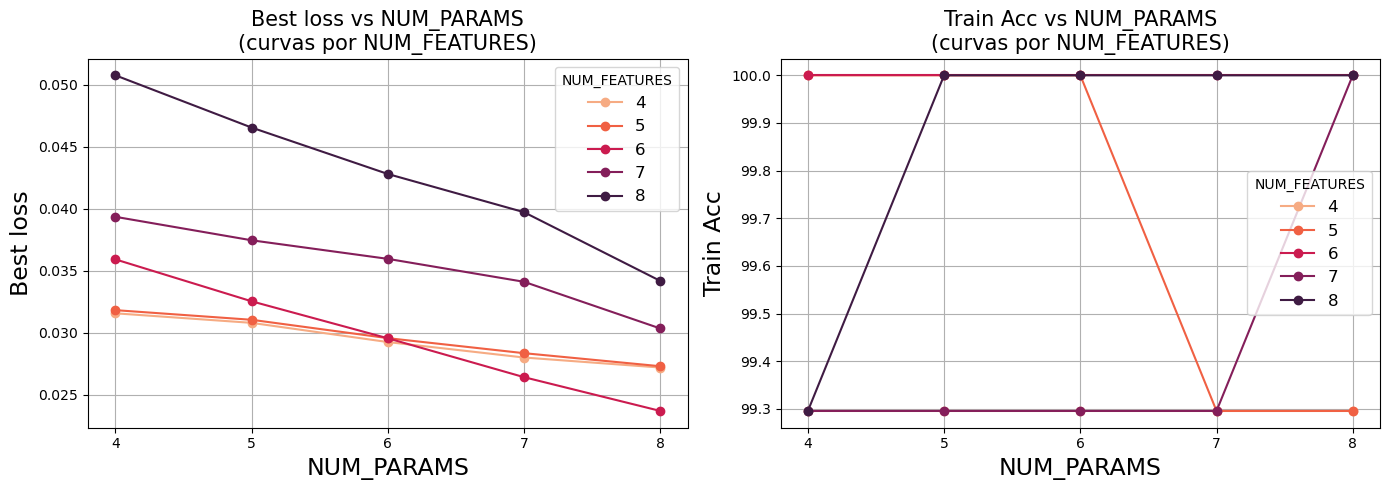

In [10]:
import pickle, glob, re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/4params_sum_3"
pattern  = f"{SAVE_DIR}/results_NUM_FEATURES_*_NUM_PARAMS_*_LAYERS_6.pkl"

rows = []
for fname in glob.glob(pattern):
    m = re.search(r"NUM_FEATURES_(\d+)_NUM_PARAMS_(\d+)_", fname)
    if not m:
        continue
    num_features = int(m.group(1))
    num_params   = int(m.group(2))

    with open(fname, "rb") as f:
        results = pickle.load(f)

    # Encontrar el trial con menor loss
    best_trial = min(results, key=lambda r: r["loss"])

    rows.append({
        "NUM_FEATURES": num_features,
        "NUM_PARAMS":   num_params,
        "best_loss":    best_trial["loss"],
        "train_acc":    best_trial["train_acc"]
    })

df = pd.DataFrame(rows)


# Plots
palette = sns.color_palette("rocket", len(np.arange(4, 9)))
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
# --- Best loss ---
for idx, feat in enumerate(sorted(df["NUM_FEATURES"].unique())):
    sub = df[df["NUM_FEATURES"] == feat].sort_values("NUM_PARAMS")
    ax[0].plot(
        sub["NUM_PARAMS"],
        sub["best_loss"],
        marker="o",
        label=f"{feat}",
        color=palette[4 - idx]
    )

ax[0].set_xlabel("NUM_PARAMS", fontsize=17)
ax[0].set_ylabel("Best loss", fontsize=17)
ax[0].set_title("Best loss vs NUM_PARAMS\n(curvas por NUM_FEATURES)", fontsize=15)
ax[0].set_xticks([4, 5, 6, 7, 8])
ax[0].legend(title="NUM_FEATURES", fontsize=12)
ax[0].grid(True)
# --- Train Acc ---
for idx, feat in enumerate(sorted(df["NUM_FEATURES"].unique())):
    sub = df[df["NUM_FEATURES"] == feat].sort_values("NUM_PARAMS")
    ax[1].plot(
        sub["NUM_PARAMS"],
        sub["train_acc"],
        marker="o",
        label=f"{feat}",
        color=palette[4 - idx]
    )
ax[1].set_xlabel("NUM_PARAMS", fontsize=17)
ax[1].set_ylabel("Train Acc", fontsize=17)
ax[1].set_title("Train Acc vs NUM_PARAMS\n(curvas por NUM_FEATURES)", fontsize=15)
ax[1].set_xticks([4, 5, 6, 7, 8])
ax[1].legend(title="NUM_FEATURES", fontsize=12)
ax[1].grid(True)

fig.tight_layout()
plt.show()


## Loss curves

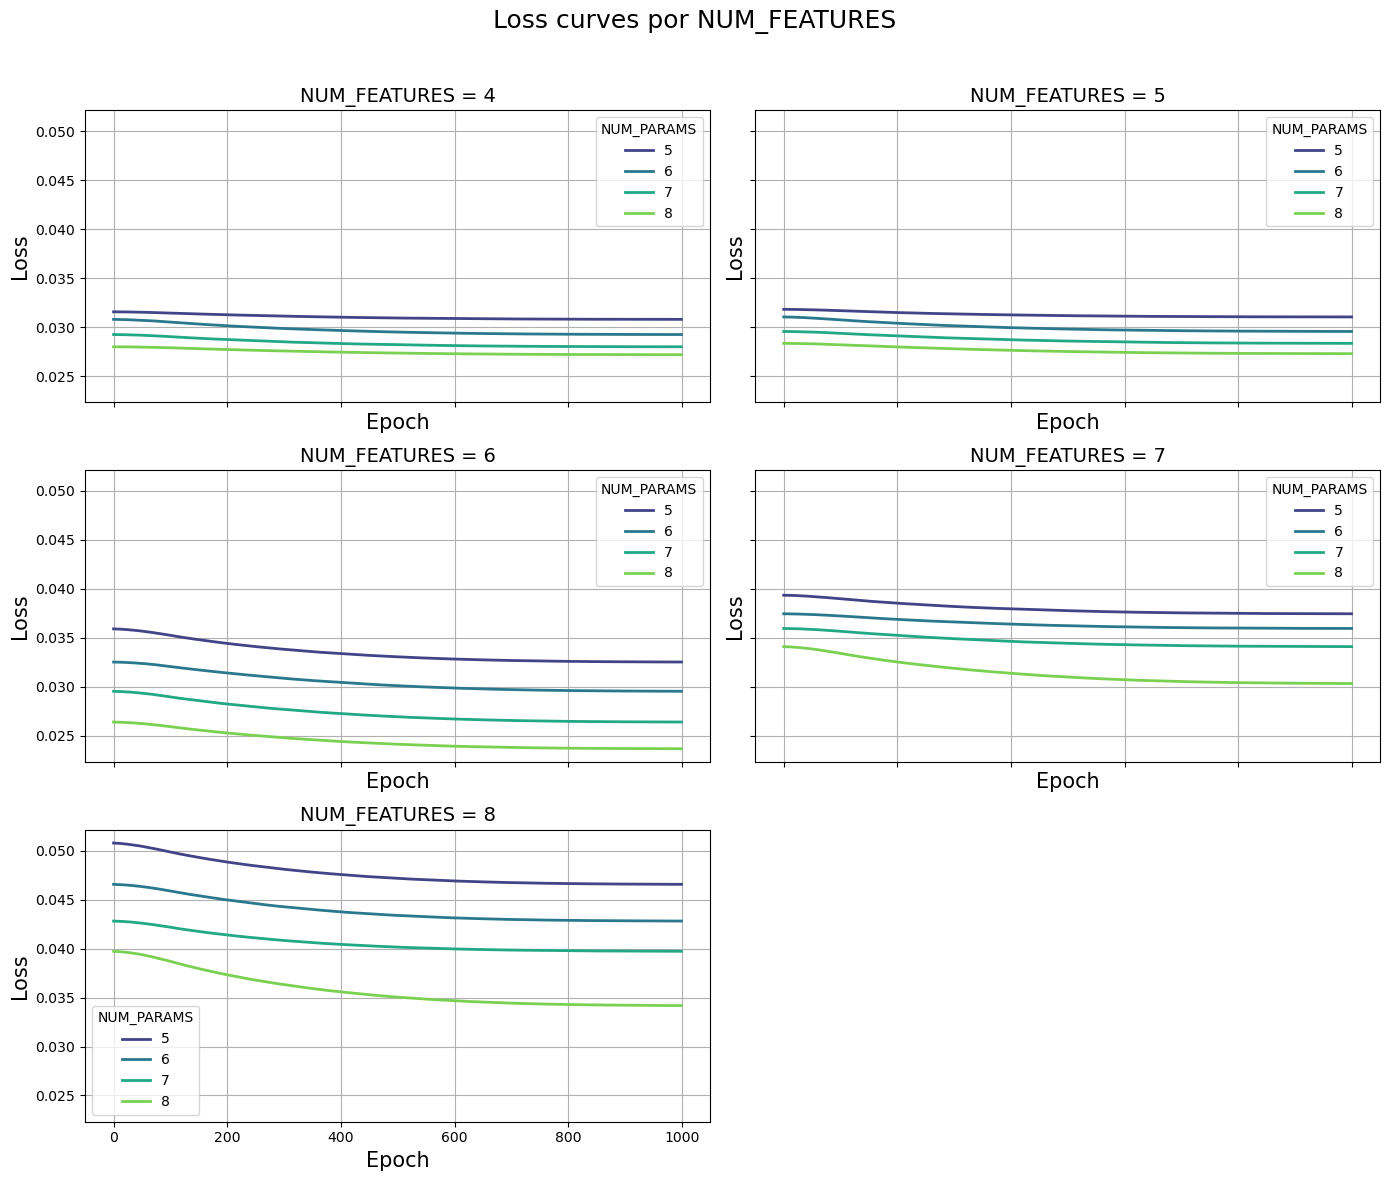

In [9]:
import glob, re, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/4params_sum_3"
features_list = [4, 5, 6, 7, 8]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.ravel() 

for ax, feat in zip(axes, features_list):
    pattern = os.path.join(
        BASE_SAVE_DIR,
        f"loss_curve_NUM_FEATURES_{feat}_NUM_PARAMS_*_LAYERS_6.csv"
    )

    files = sorted(glob.glob(pattern))
    palette = sns.color_palette("viridis", len(files))

    for i, fname in enumerate(files):
        m = re.search(r"NUM_PARAMS_(\d+)_", fname)
        if not m:
            continue
        num_params = int(m.group(1))

        df = pd.read_csv(fname)

        ax.plot(
            df["Epoch"],
            df["train_loss"],
            label=f"{num_params}",
            lw=2,
            color=palette[i]
        )
    ax.set_title(f"NUM_FEATURES = {feat}", fontsize=14)
    ax.set_xlabel("Epoch", fontsize=15)
    ax.set_ylabel("Loss", fontsize=15)
    ax.grid(True)
    ax.legend(title="NUM_PARAMS", fontsize=10)

if len(features_list) < len(axes):
    axes[len(features_list)].axis("off")
fig.suptitle("Loss curves por NUM_FEATURES", fontsize=18)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



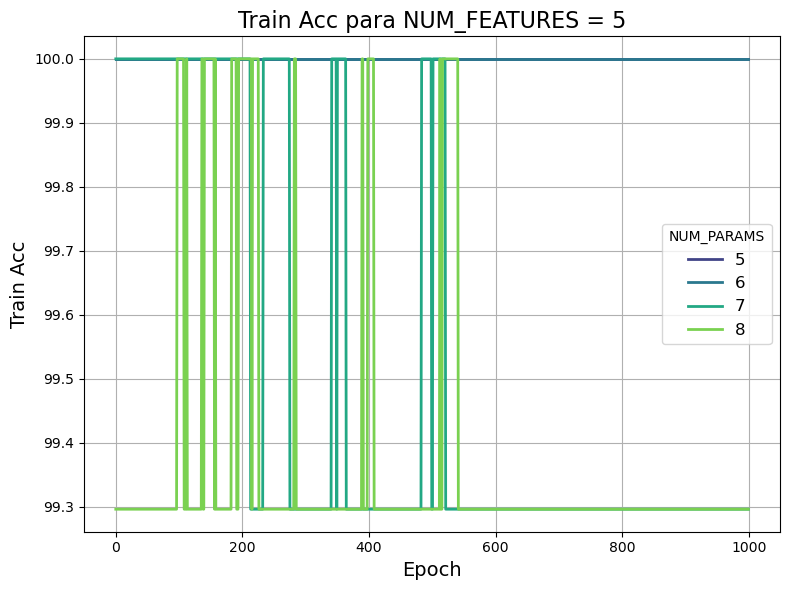

In [4]:
import glob, re, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/4params_sum_3"
feat = 5
 
pattern = os.path.join(
    BASE_SAVE_DIR,
    f"loss_curve_NUM_FEATURES_{feat}_NUM_PARAMS_*_LAYERS_6.csv"
)
 
files = sorted(glob.glob(pattern))
palette = sns.color_palette("viridis", len(files))
 
plt.figure(figsize=(8, 6))
 
for i, fname in enumerate(files):
    m = re.search(r"NUM_PARAMS_(\d+)_", fname)
    if not m:
        continue
    num_params = int(m.group(1))
 
    df = pd.read_csv(fname)
 
    plt.plot(
        df["Epoch"],
        df["train_acc"],
        label=f"{num_params}",
        lw=2,
        color=palette[i]
    )
 
plt.title(f"Train Acc para NUM_FEATURES = {feat}", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Train Acc", fontsize=14)
plt.grid(True)
plt.legend(title="NUM_PARAMS", fontsize=12)
plt.tight_layout()
plt.show()